## Exploratory Data Analysis

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("seaborn-v0_8")

array([[<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'hba1c_percentage'}>],
       [<Axes: title={'center': 'fpg_mmol_L'}>,
        <Axes: title={'center': 'hdl_mmol_L'}>,
        <Axes: title={'center': 'lifetime_100_cigs_smoked'}>],
       [<Axes: title={'center': 'current_smoking_freq'}>, <Axes: >,
        <Axes: >]], dtype=object)

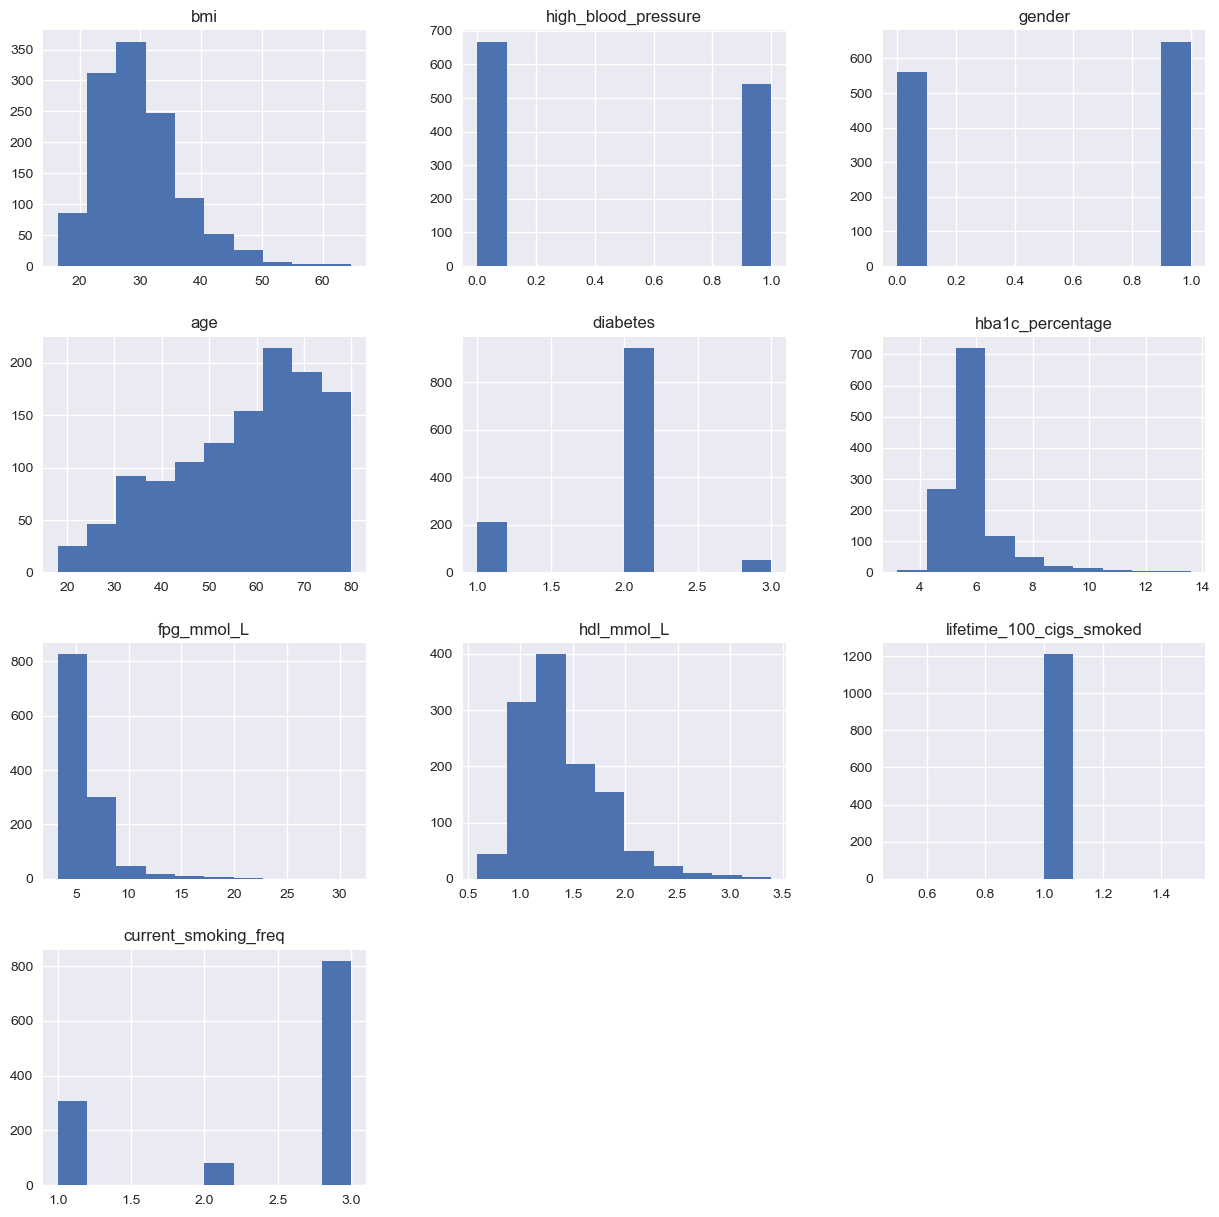

In [15]:
df = pd.read_csv("../data/interim/nhanes_data_interim.csv")

df.hist(figsize=(15,15))

In [3]:
# # KDE Histogram plot for BMI, coloured by their BMI range
# sns.histplot(df["bmi"], kde=True, fill=True, color="gray")

# # Vertical boundary lines for BMI ranges
# plt.axvline(x=18.5, color="black", linestyle="--")
# plt.axvline(x=23.0, color="black", linestyle="--")
# plt.axvline(x=27.5, color="black", linestyle="--")

# # Fill areas between lines for each BMI category
# plt.axvspan(df["bmi"].min(), 18.5, color="skyblue", alpha=0.5, label="Underweight")
# plt.axvspan(18.5, 23.0, color="lightgreen", alpha=0.5, label="Normal")
# plt.axvspan(23.0, 27.5, color="lightyellow", alpha=0.5, label="Overweight")
# plt.axvspan(27.5, df["bmi"].max(), color="salmon", alpha=0.5, label="Obese")

# plt.title("KDE Histogram Plot of BMI Distribution with BMI ranges")
# plt.xlabel("BMI")
# plt.ylabel("Count")
# plt.legend()
# plt.grid(True)
# plt.show()

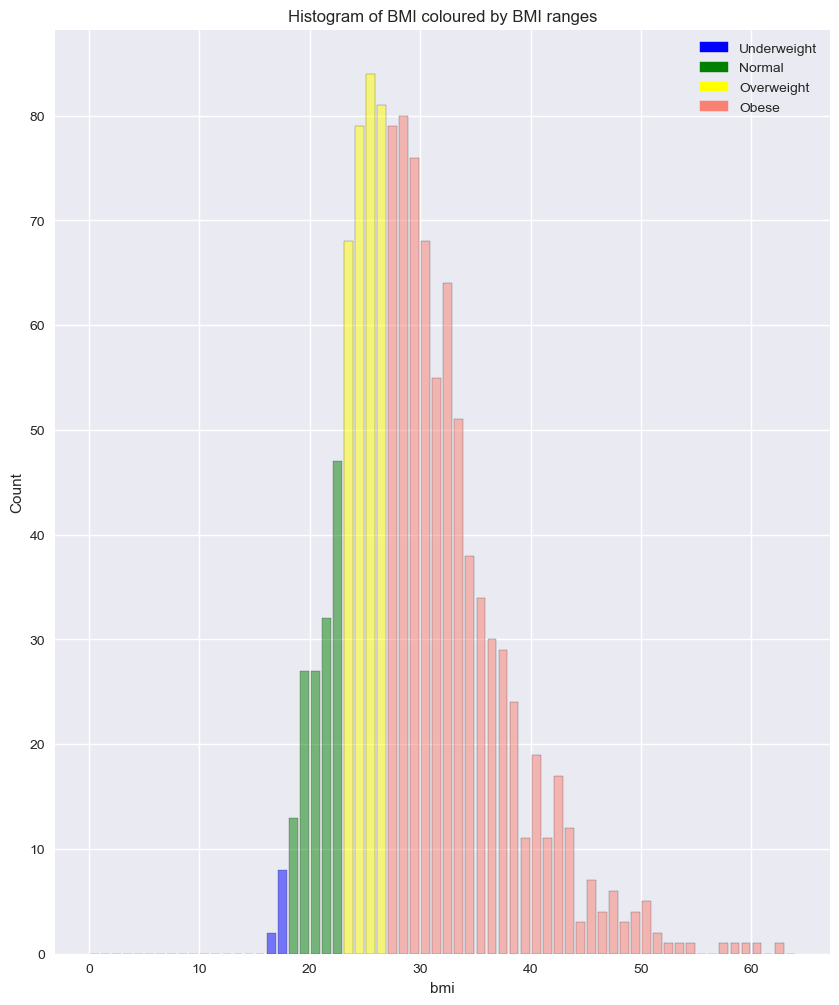

In [16]:
# Plot a histogram of BMI with coloured bars based on BMI range
hist, bin_edges = np.histogram(df["bmi"], bins=np.arange(0, df["bmi"].max(), 1))

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

colors = []
for bmi in bin_centers:    
    if bmi < 18.5:
        colors.append("blue")
    elif bmi < 23.0:
        colors.append("green")
    elif bmi < 27.5:
        colors.append("yellow")
    else:
        colors.append("salmon")

plt.figure(figsize=(10,12))
plt.bar(bin_centers, hist, color=colors, edgecolor="black", alpha=0.5)

from matplotlib.patches import Patch
legend_elements = [
    Patch(color="blue", label="Underweight"),
    Patch(color="green", label="Normal"),
    Patch(color="yellow", label="Overweight"),
    Patch(color="salmon", label="Obese")
    ]

plt.title("Histogram of BMI coloured by BMI ranges")
plt.legend(handles=legend_elements)
plt.xlabel("bmi")
plt.ylabel("Count")
plt.grid(True)
plt.show()

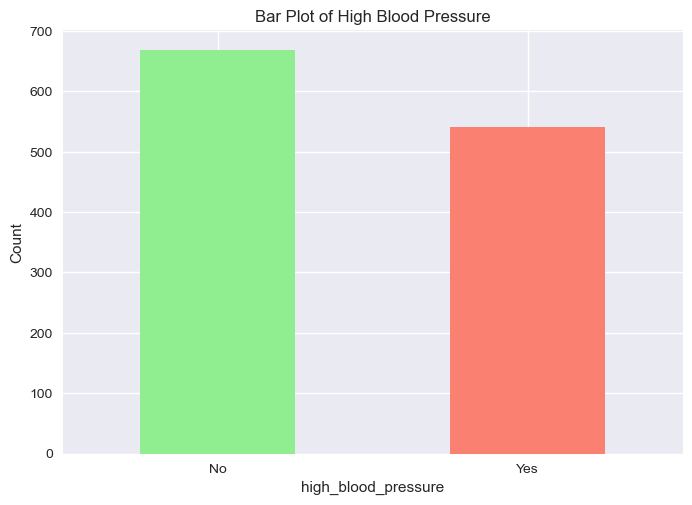

In [17]:
df["high_blood_pressure"].value_counts().plot(kind="bar", color=["lightgreen", "salmon"])

plt.xticks([0,1], ["No", "Yes"])
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Bar Plot of High Blood Pressure")
plt.show()

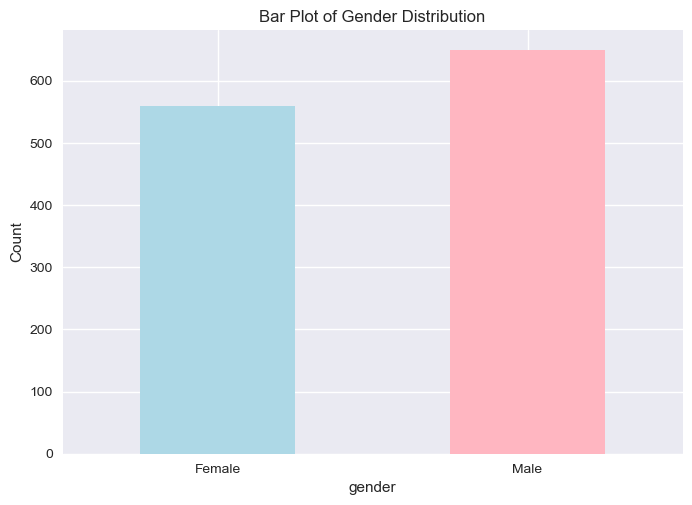

In [18]:
df["gender"].value_counts().sort_index().plot(kind="bar", color=["lightblue", "lightpink"])

plt.xticks([0,1], ["Female", "Male"])
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Bar Plot of Gender Distribution")
plt.show()

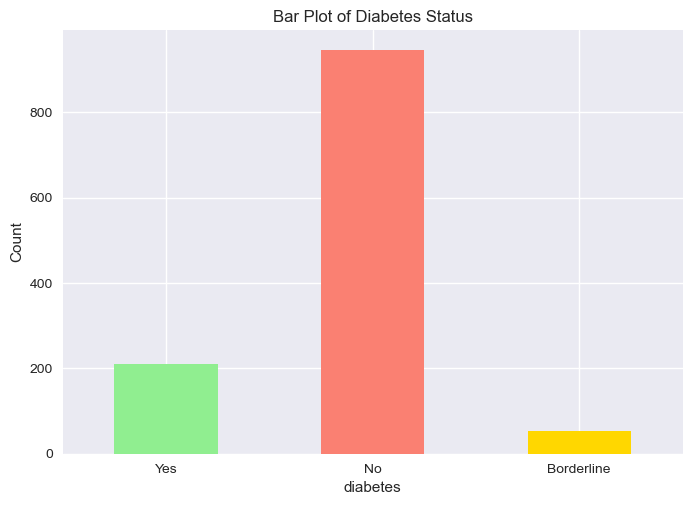

In [19]:
df["diabetes"].value_counts().sort_index().plot(kind="bar", color=["lightgreen", "salmon", "gold"])

plt.xticks([0,1,2], ["Yes", "No", "Borderline"])
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Bar Plot of Diabetes Status")
plt.show()

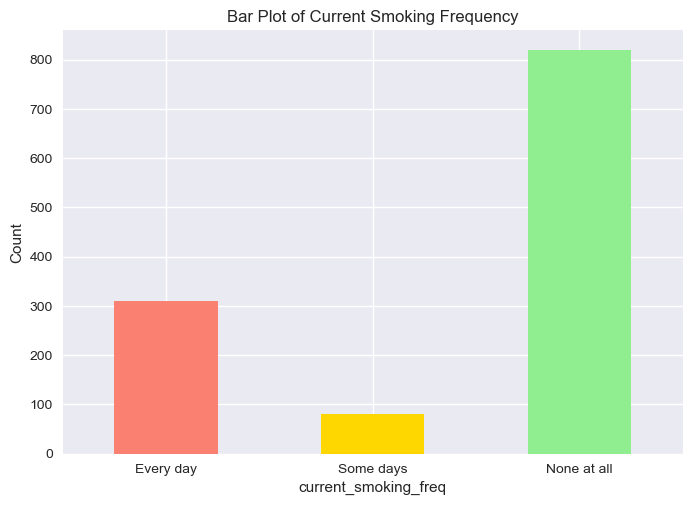

In [20]:
df["current_smoking_freq"].value_counts().sort_index().plot(kind="bar", color=["salmon", "gold", "lightgreen"])

plt.xticks([0,1,2], ["Every day", "Some days", "None at all"])
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Bar Plot of Current Smoking Frequency")
plt.show()

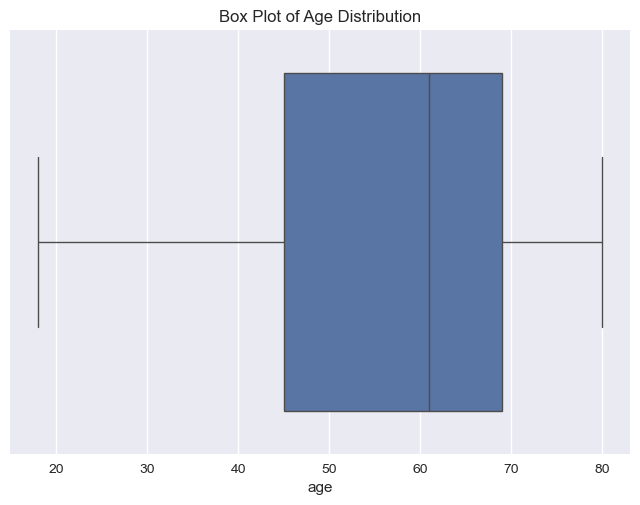

In [21]:
sns.boxplot(x="age", data=df)

plt.title("Box Plot of Age Distribution")
plt.show()

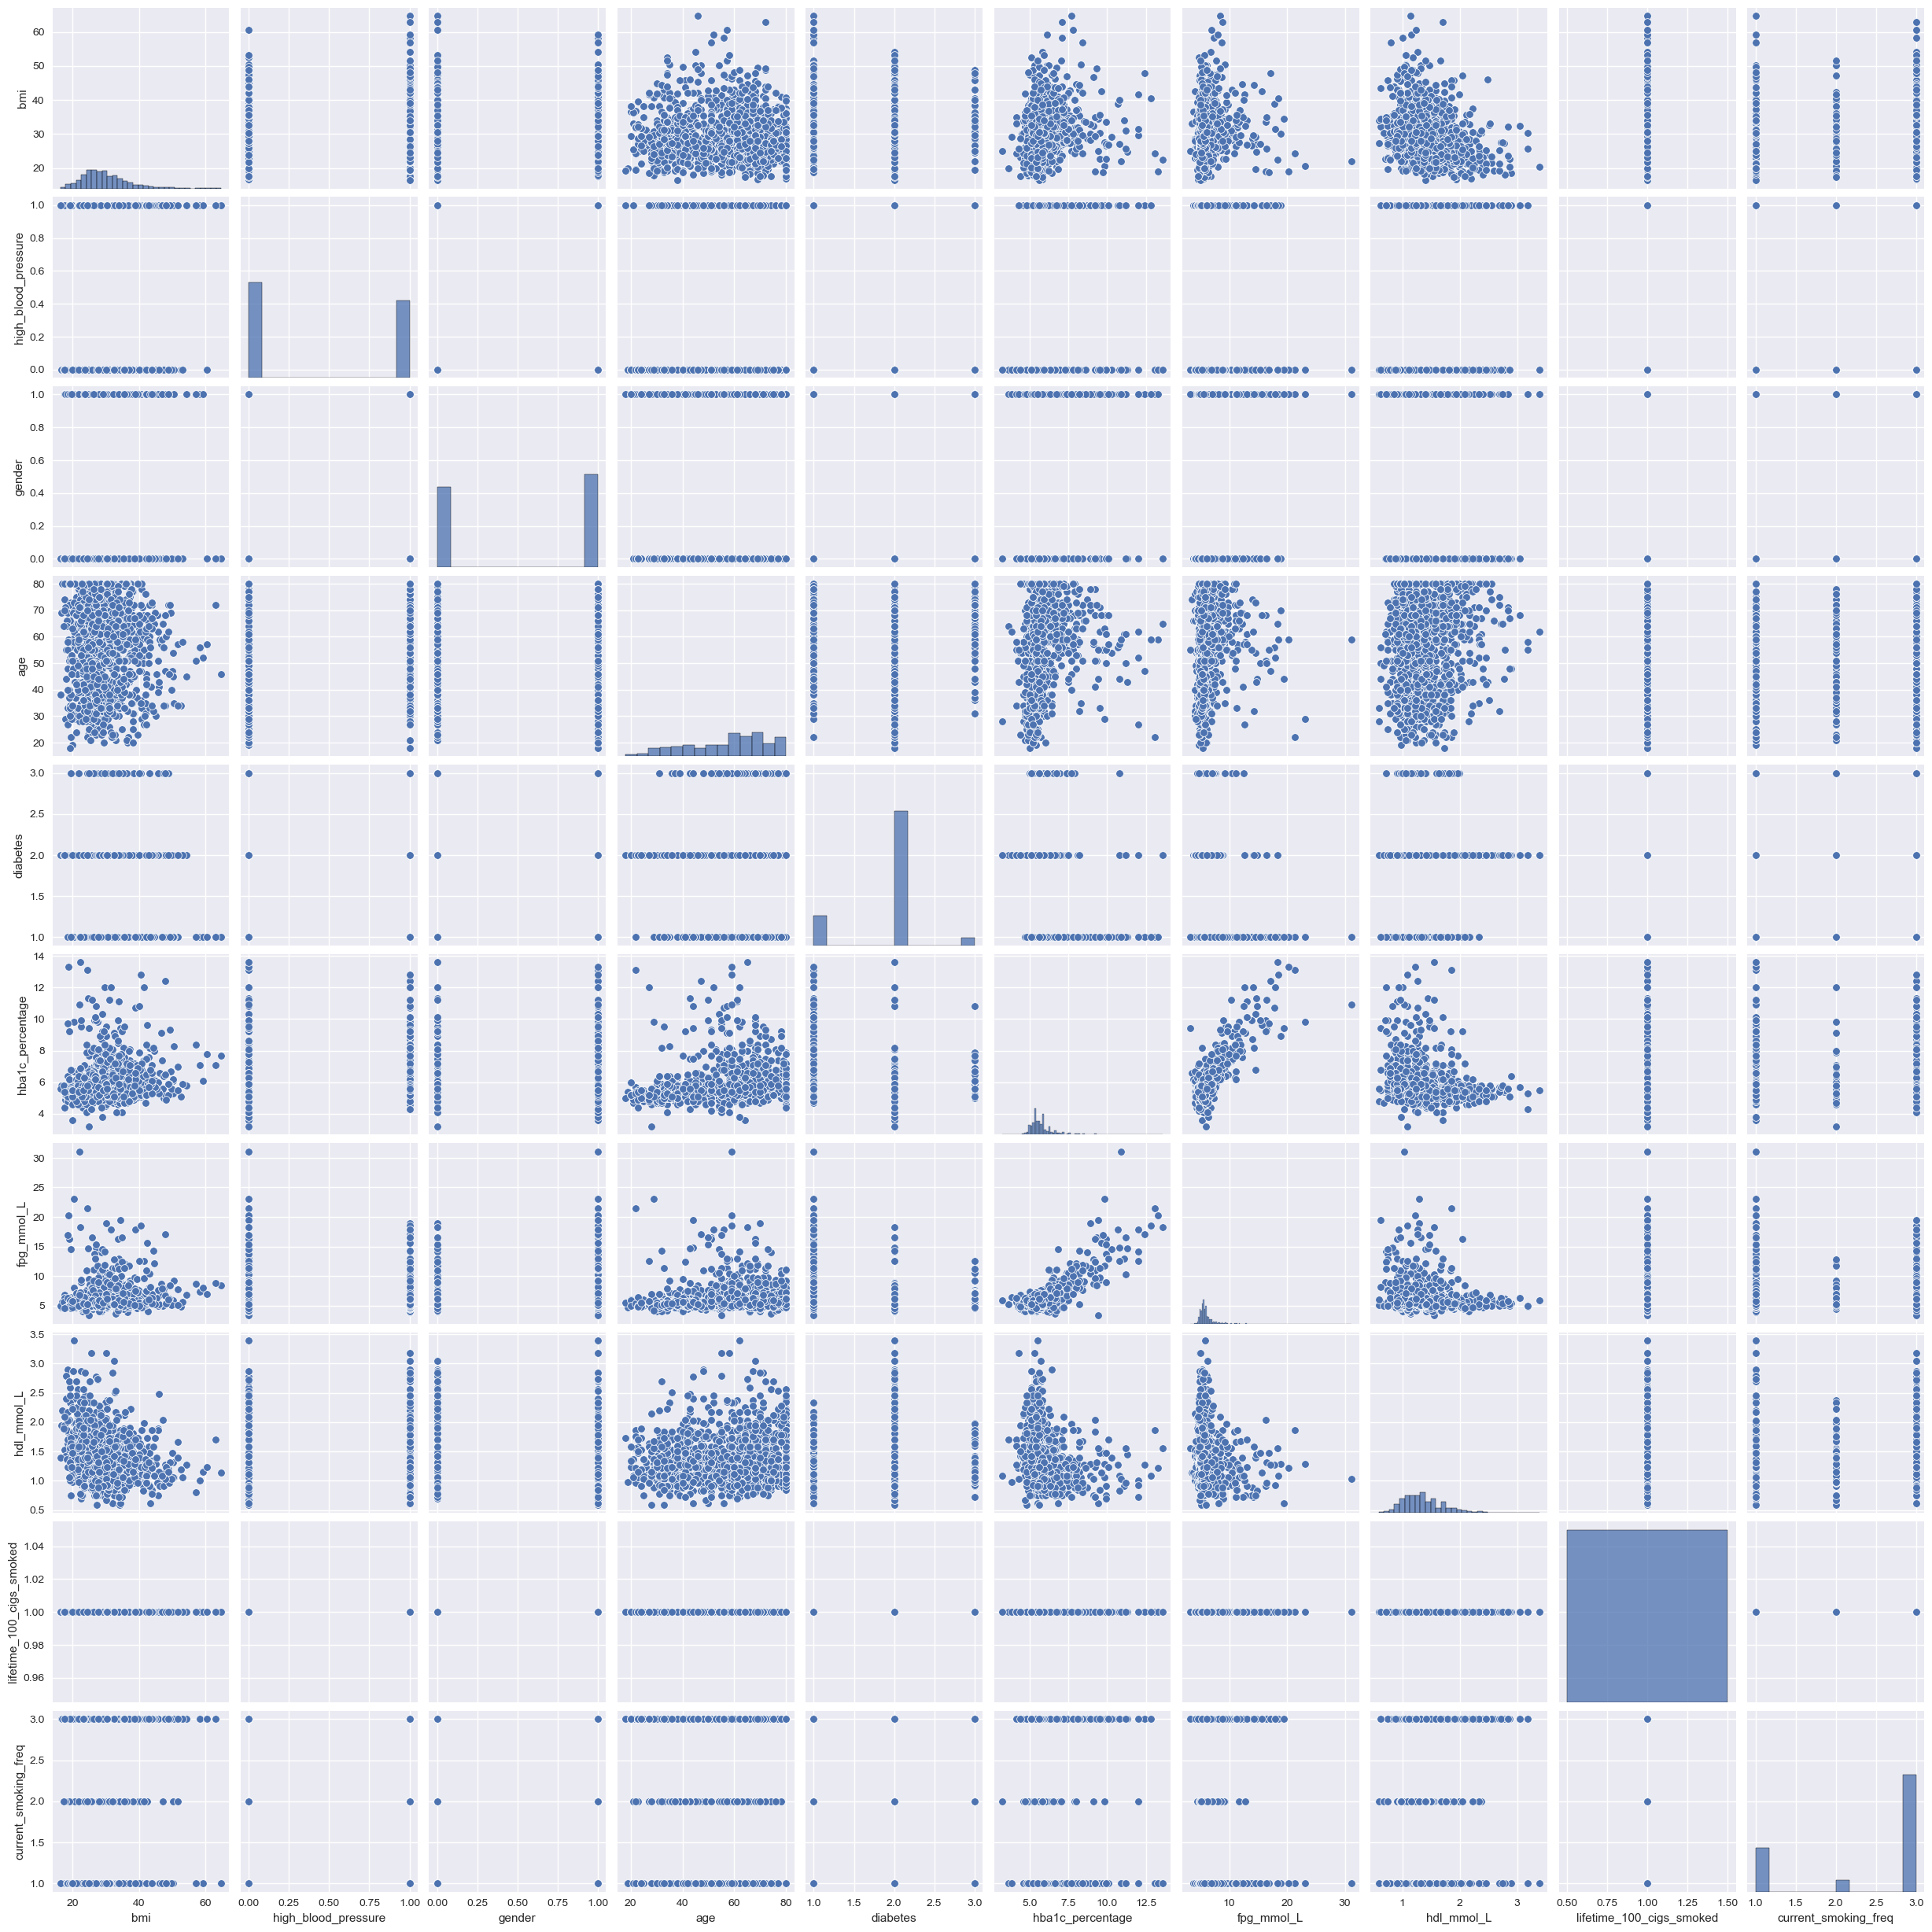

In [22]:
sns.pairplot(df)

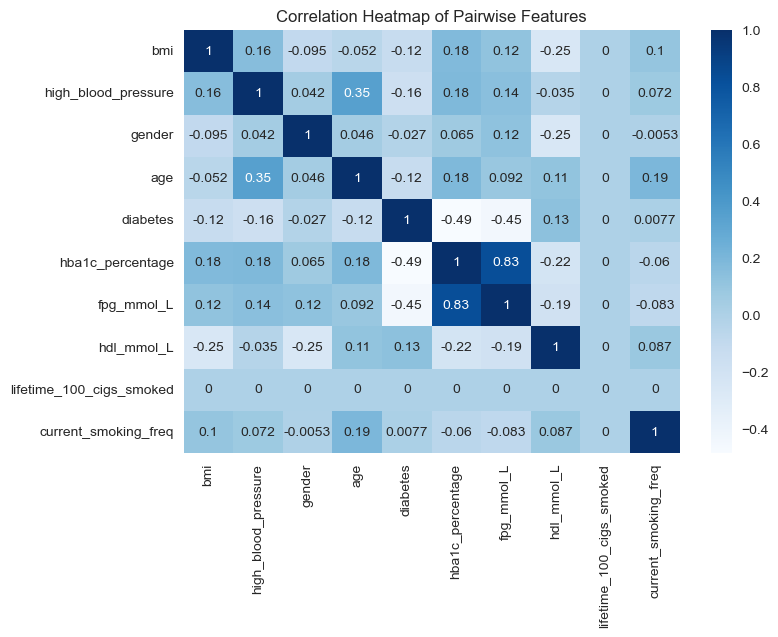

In [23]:
corr = df.corr().fillna(0)

sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Pairwise Features")
plt.show()